
![WHO](download.jpeg "WHO")

# Life Expectancy (WHO)

## Description

### Context
#### Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

### content
#### The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

### Acknowledgements
#### The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

### Inspiration
#### The data-set aims to answer the following key questions:

* Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
* Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
* How does Infant and Adult mortality rates affect life expectancy?
* Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
* What is the impact of schooling on the lifespan of humans?
* Does Life Expectancy have positive or negative relationship with drinking alcohol?
* Do densely populated countries tend to have lower life expectancy?
* What is the impact of Immunization coverage on life Expectancy?

### Loading important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.color_palette("deep", 8)
%matplotlib inline    
#for interactive visualization

### Loading the dataset

In [2]:
data = pd.read_csv("archive/Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Looking at the data set structure

In [3]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [4]:
data.describe()    #description of the dataset

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
data.shape

(2938, 22)

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Exploratory Data Analysis

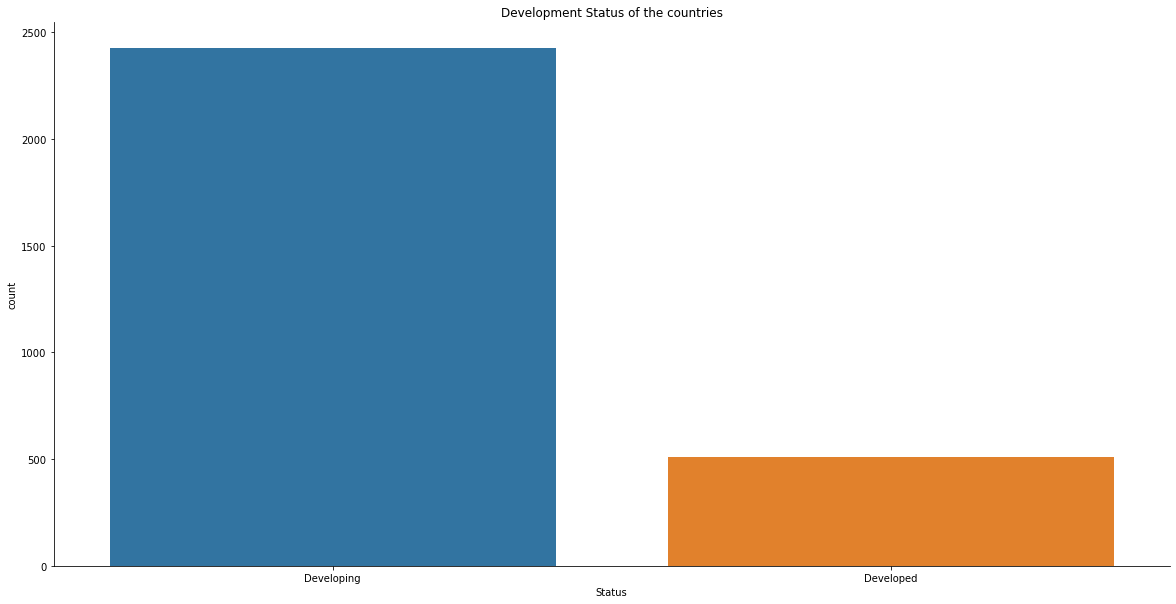

In [8]:
plt.figure(figsize = (20,10))
sns.countplot(data["Status"])
plt.title("Development Status of the countries")
sns.despine()

Majority of the countries are still developing and it seems like the data has not been collected from underdeveloped countries.

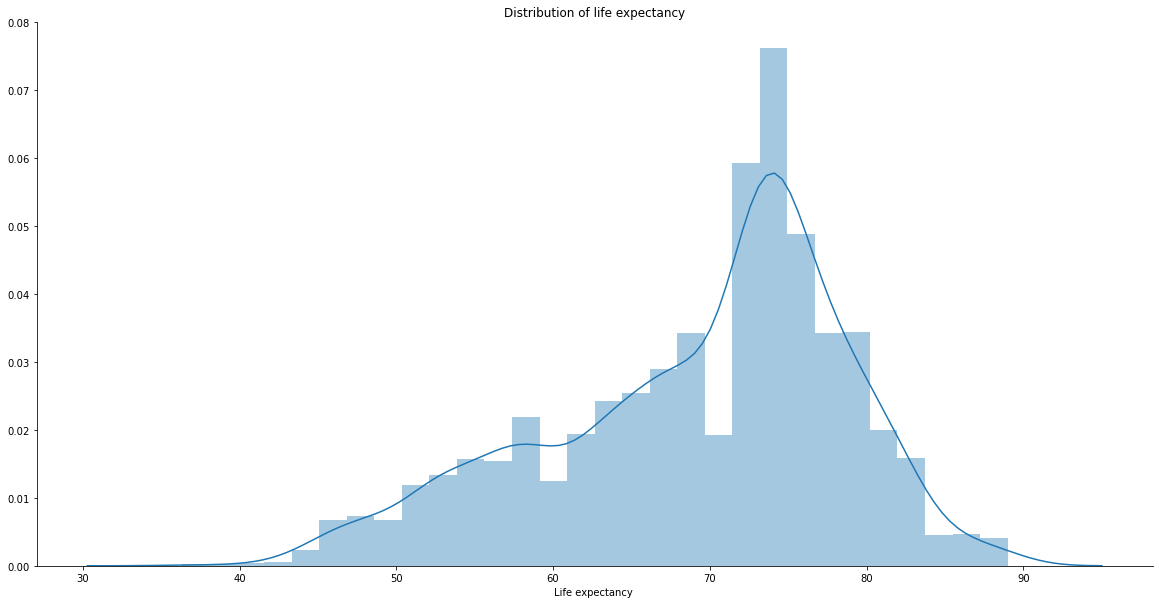

In [9]:
plt.figure(figsize = (20,10))
sns.distplot(data["Life expectancy "])
plt.title("Distribution of life expectancy")
sns.despine()


The plot is skewed towards right and also has a long tail towars it's left.

<Figure size 2160x2160 with 0 Axes>

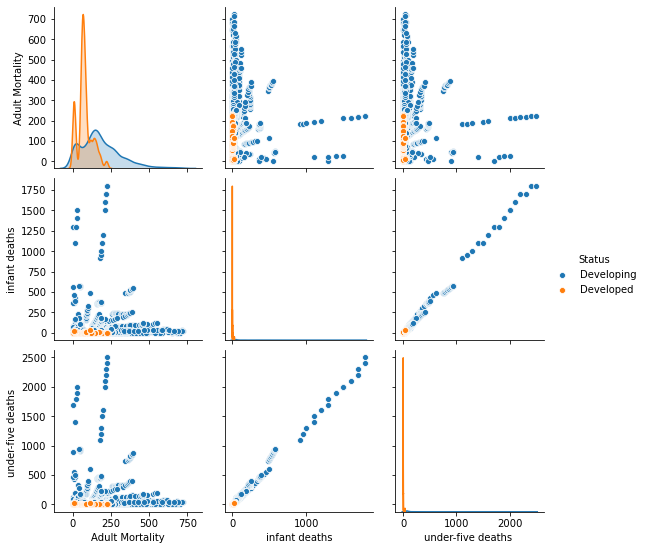

In [10]:
plt.figure(figsize = (30,30))
sns.pairplot(data[['Adult Mortality',
       'infant deaths',"under-five deaths ","Status"]],hue = "Status")

From the above pair plot it is visible that the mortality rate is lower in developed countries and also infant deaths and under-five deaths have a very strong correlation almost perfect because it basically means the same.

The distribution for all three are left skewed.

<Figure size 2160x2160 with 0 Axes>

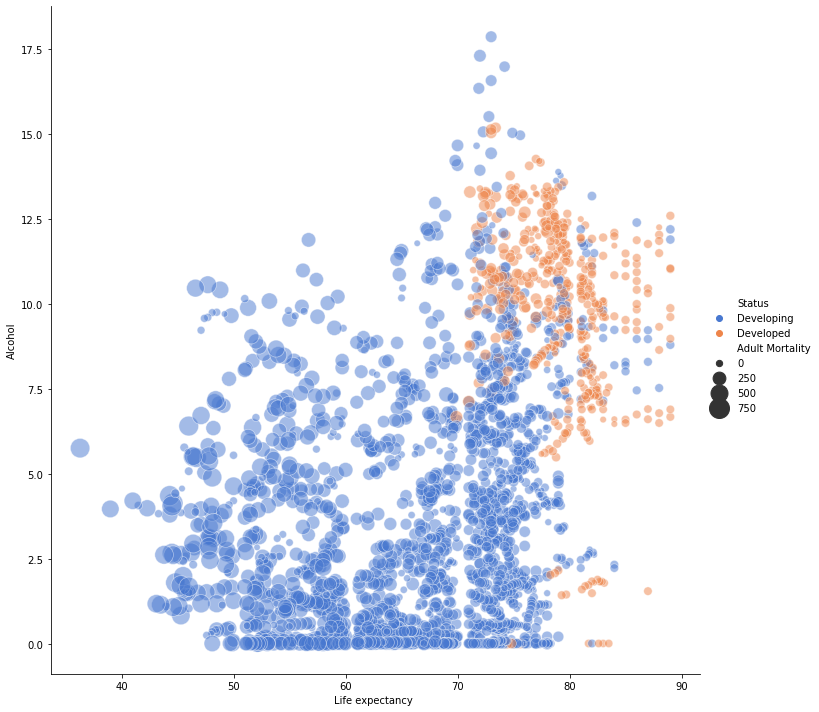

In [11]:
plt.figure(figsize = (30,30))
sns.relplot(x= "Life expectancy " , y = "Alcohol", hue="Status", size="Adult Mortality",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=data)

#### Even though there is no correlation between Life expectancy and Alcohol
#### The above plot tells us 3 importants points:
* The developed countries are at the right hand side of the graph which tells us that developed countries have higher life expectency.
* Most of the points are gathered towards the bottom which means the lower the alcohol consumption the lower the mortality rate of live expectancy.
* Even though developed countries have high alcohol consumption rate still their life expectancy is high this is maybe because of the quality of the alcohol.

### Now Let us try to answer all the questions we aim to answer.
#### Question 1: Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

Text(0.5, 1.0, 'Correlation of Life expectancy with mortality rate')

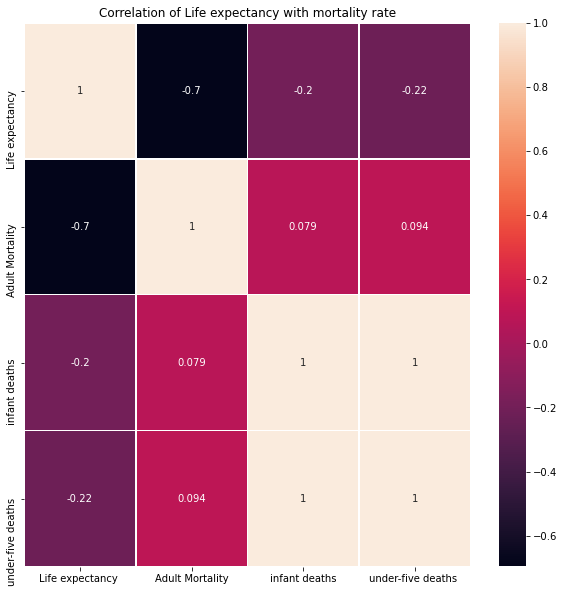

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(data[['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'under-five deaths ']].corr(), annot=True, linewidths=.5)
plt.title("Correlation of Life expectancy with mortality rate")

In the above correlation heatmap the Adult mortality rate has a high negative correlation to Life expactancy.

Text(0.5, 1.0, 'Correlation of Life expectancy with Diseases')

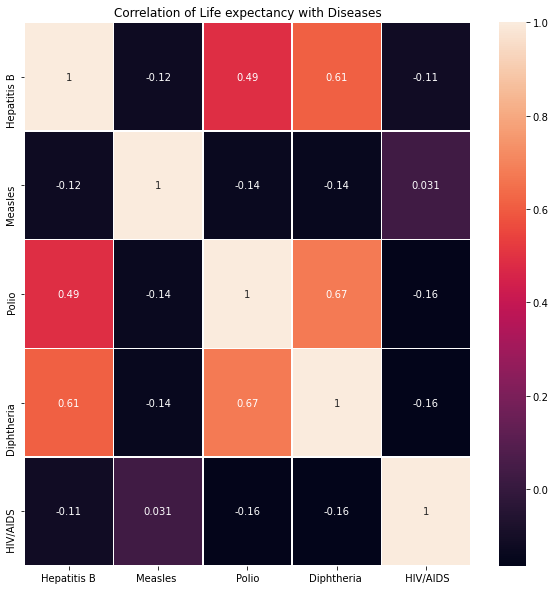

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(data[['Hepatitis B',
       'Measles ', 'Polio',
       'Diphtheria ', ' HIV/AIDS',]].corr(), annot=True, linewidths=.5)
plt.title("Correlation of Life expectancy with Diseases")

Diphtheria has some positive correlation it is not high but it can be considered. Polio also have low positive correlation.

Text(0.5, 1.0, 'Correlation of Life expectancy with Physical features')

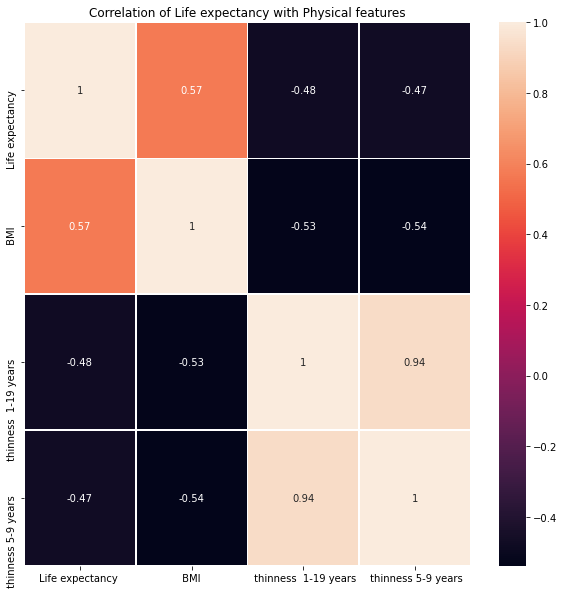

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(data[['Life expectancy ',' BMI ',
       ' thinness  1-19 years', ' thinness 5-9 years']].corr(), annot=True, linewidths=.5)
plt.title("Correlation of Life expectancy with Physical features")

All three variables are mediumly correlated

Text(0.5, 1.0, 'Correlation of Life expectancy with Other features like country expenditure and economy')

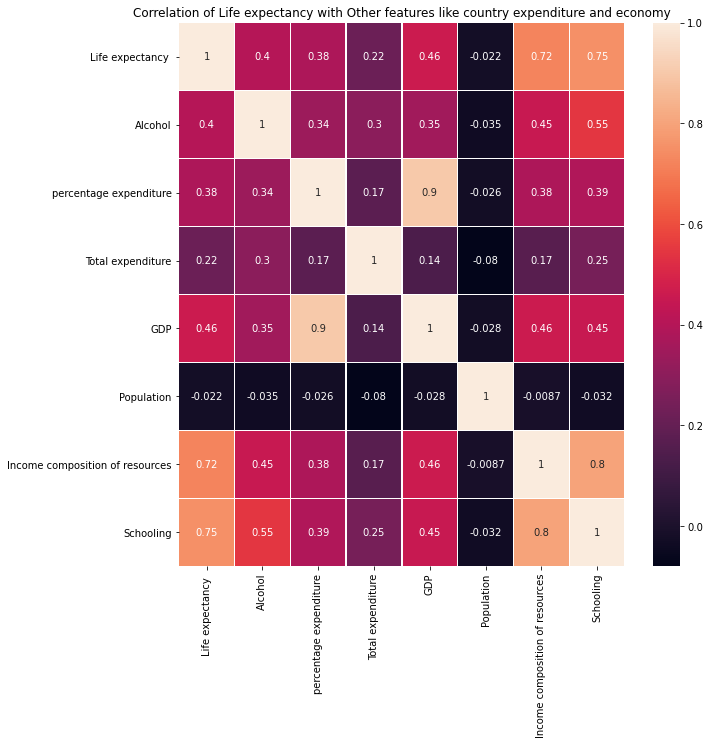

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(data[['Life expectancy ','Alcohol', 'percentage expenditure','Total expenditure',
       'GDP', 'Population','Income composition of resources', 'Schooling']].corr(), annot=True, linewidths=.5)
plt.title("Correlation of Life expectancy with Other features like country expenditure and economy")

Schooling and Income composition of resources have good positive correlation.

#### So in my opinion there are some features that are affeting life expectancy
#### The features that are affecting Life expectency are:
* Adult Mortality
* Diphtheria
* Schooling
* Income composition

#### Question 2:  Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

#### Total expenditure on health percent(%) with respect to overall government expenditure

<Figure size 720x720 with 0 Axes>

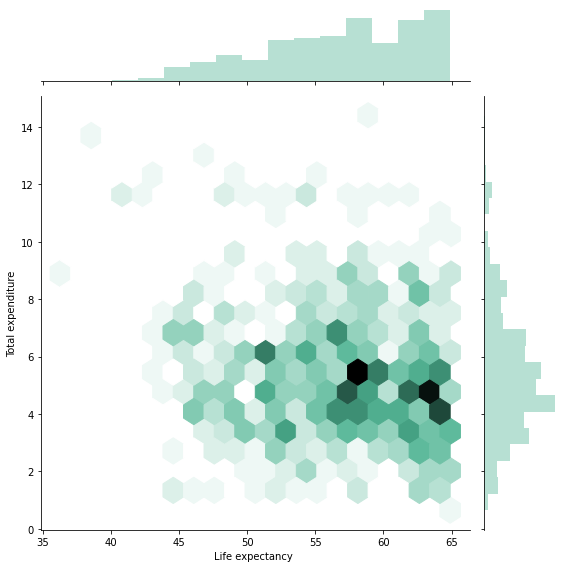

In [21]:
plt.figure(figsize = (10,10))
sns.jointplot(x=data["Life expectancy "][data["Life expectancy "] < 65], 
              y=data["Total expenditure"][data["Life expectancy "] < 65], 
              kind="hex", color="#4CB391",height = 8)

### from the above hexbin plot we can assume that Life expectancy is more with less total expenditure

#### Total expenditure on health percent(%) with respect to GDP of the country

<Figure size 720x720 with 0 Axes>

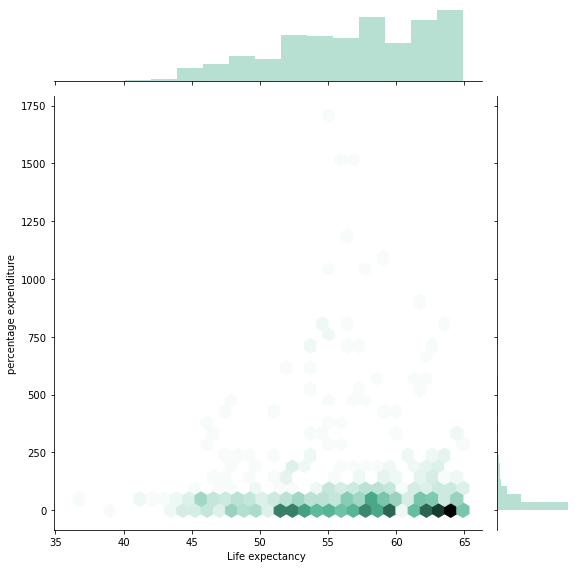

In [22]:
plt.figure(figsize = (10,10))
sns.jointplot(x=data["Life expectancy "][data["Life expectancy "] < 65], 
              y=data["percentage expenditure"][data["Life expectancy "] < 65], 
              kind="hex", color="#4CB391",height = 8)

#### from the above hexbin plot we can assume that Life expectancy is more with less percentage expenditure
#### from both the cases we can confirm one thing that higher expenditure is not required for increasing life expectancy.So the answer is no countries with life expectancy less than 65 are not required to increase their total expenditure.

#### Question 3: How does Infant and Adult mortality rates affect life expectancy?

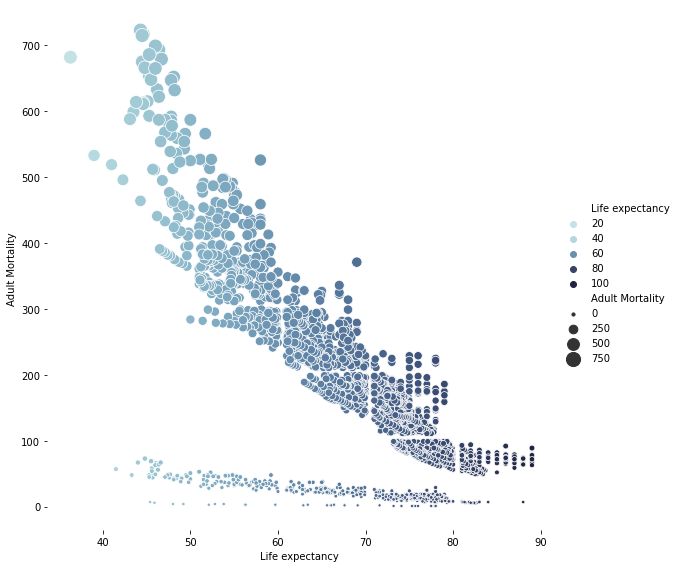

In [20]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Life expectancy ", y="Adult Mortality",
    hue="Life expectancy ", size="Adult Mortality",
    palette=cmap, sizes=(10, 200),height = 8
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

#### We can see that there is a negative correlation between Adult mortality rate and life expectancy, which is completely reasonable because countries with higher Adult death rate have lower life expectancy.

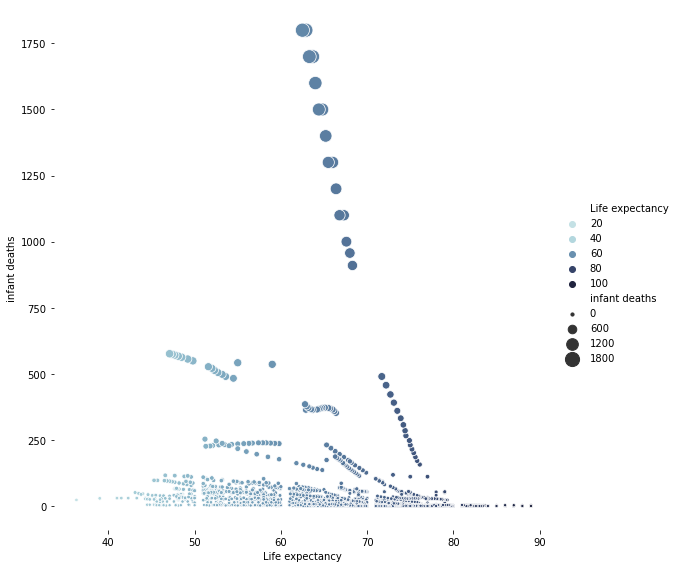

In [23]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Life expectancy ", y="infant deaths",
    hue="Life expectancy ", size="infant deaths",
    palette=cmap, sizes=(10, 200),height = 8
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

#### The above plot tells us that there is a very low negative correlation this is because infants are usually below 15-10 years of age so that means they did'nt lived long enough for the country to make an effect that's infants deaths doesn't determine the life expectancy of a particulary country although there are some countries which is not suitable for a child like war prone countries and that's why we are seeing a very low correlation instead of no correlation.

#### So the answer is that Adult mortality rate affects life expectancy but infant deaths do not.

#### Question 4: Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

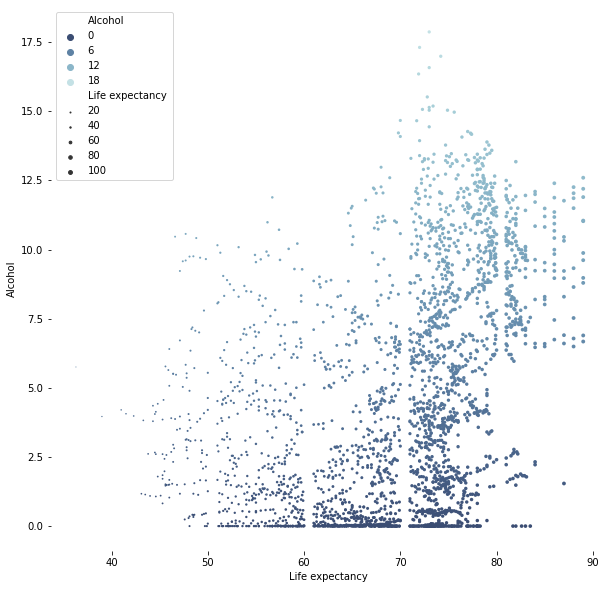

In [27]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Life expectancy ", y="Alcohol",
                hue="Alcohol", size="Life expectancy ",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 15), linewidth=0,
                data=data, ax=ax)

#### The Above plot makes it clear that there is no correlation between alcohol and Life expectancy.

#### Question 5: What is the impact of schooling on the lifespan of humans?

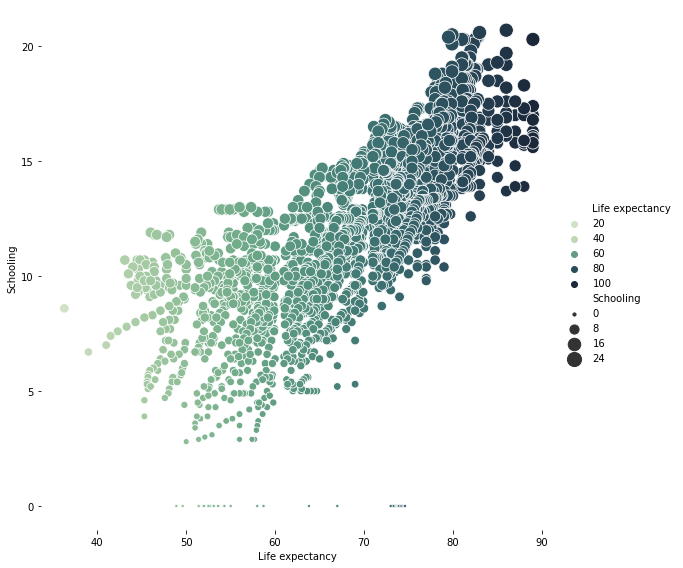

In [51]:
cmap = sns.cubehelix_palette(rot=-.5,hue = 0.7, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Life expectancy ", y="Schooling",
    hue="Life expectancy ", size="Schooling",
    palette=cmap, sizes=(10, 200),height = 8,alpha = 1
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

#### Schooling has a positive correlation with Life expectancy, Which mean the higher the years of schooling the higher the life expectancy. 

#### Question 6 : Does Life Expectancy have positive or negative relationship with drinking alcohol?

In [57]:
data.corr()["Life expectancy "][4]

0.4048767611266013

#### Even though Alcohol has low correlation with life expectancy we can say that it has a positive correlation.

#### Question 7 : Do densely populated countries tend to have lower life expectancy?

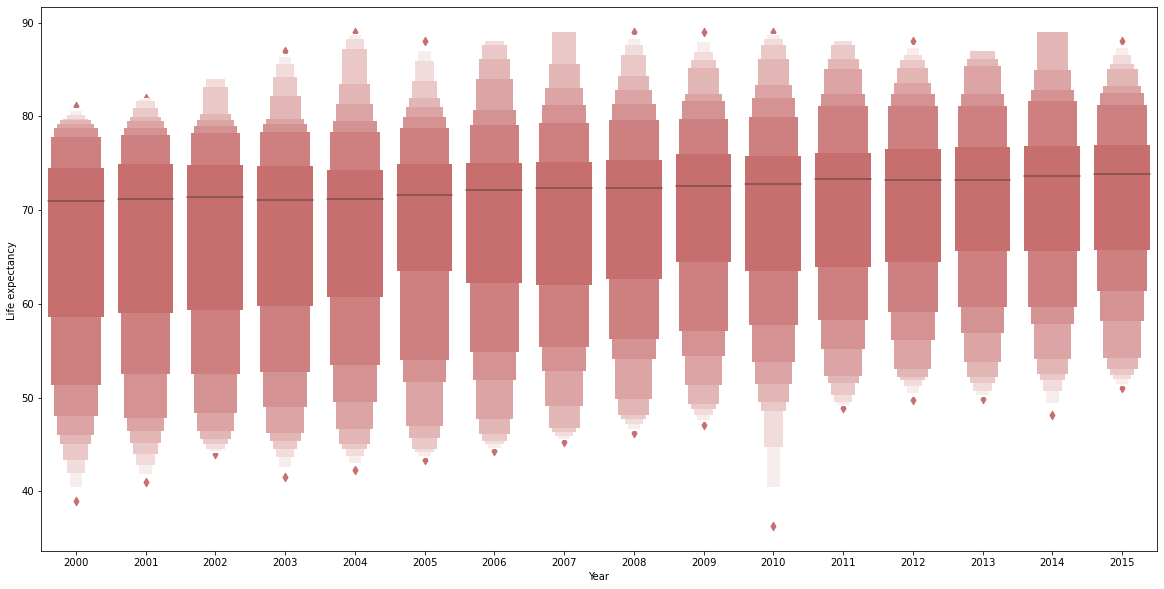

In [72]:
plt.figure(figsize = (20,10))
sns.boxenplot(x="Year", y="Life expectancy ",
              color="r",
              scale="linear", data=data)

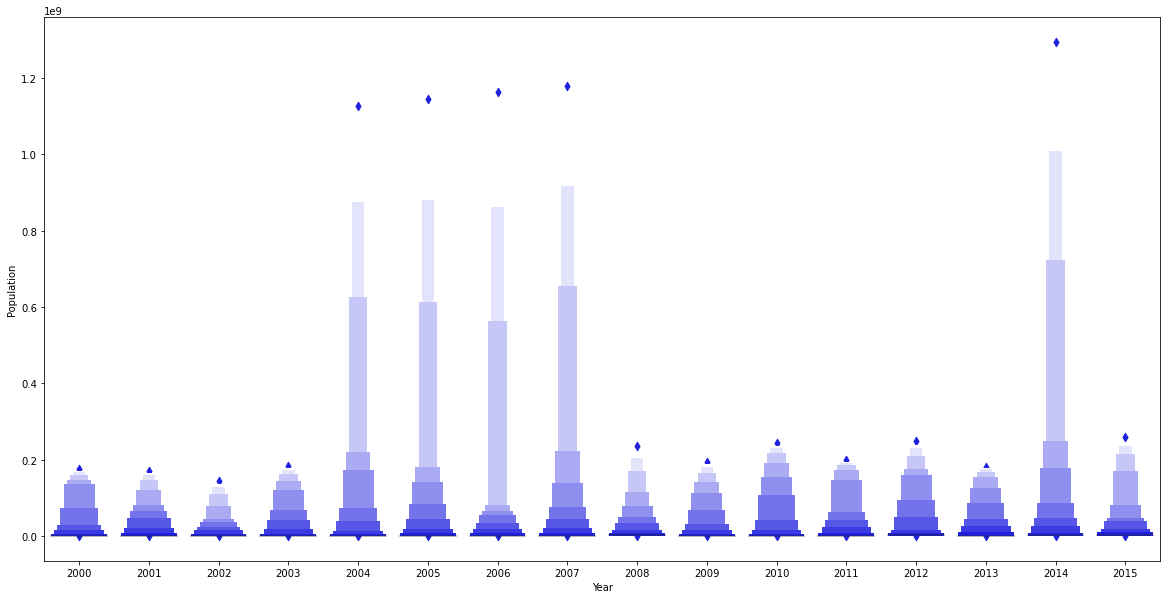

In [65]:
plt.figure(figsize = (20,10))
sns.boxenplot(x="Year", y="Population",
              color="b",
              scale="linear", data=data)

AttributeError: 'PathCollection' object has no property 'bins'

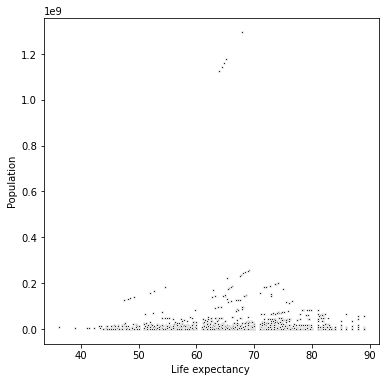

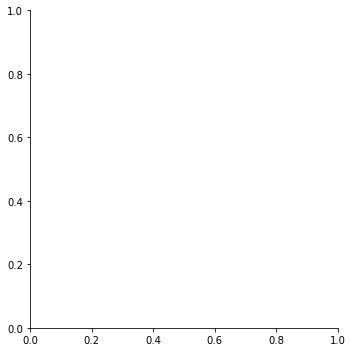

In [76]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x="Life expectancy ", y="Population", s=5, color=".15",data = data)
sns.catplot(x="Life expectancy ", y="Population", bins=50, pthresh=.1, cmap="mako",data = data)
sns.kdeplot(x="Life expectancy ", y="Population", levels=5, color="w", linewidths=1,data = data)

AttributeError: module 'seaborn' has no attribute 'displot'

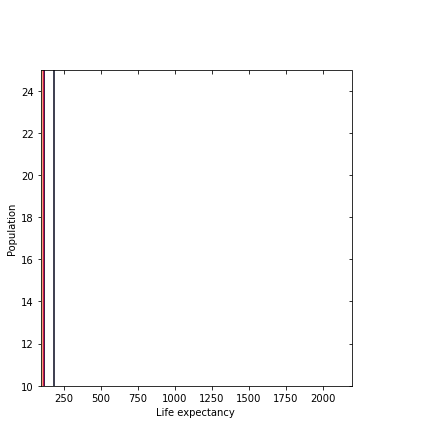

In [80]:
g = sns.JointGrid(data=data, x="Life expectancy ", y="Population", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.displot(), color="#03051A", alpha=1, bins=25)